In [8]:
import pandas as pd 
dataset = pd.read_csv(r"tweets.csv", encoding='ISO-8859-1')
dataset.head(3)

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False


In [9]:
 def gen_freq(text):
    word_list = []
    for tw_words in text.split():
        word_list.extend(tw_words)
 
    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()
 
    #Print top 10 words
    word_freq[:10]
    return word_freq

In [11]:
word_freq = gen_freq(dataset.text.str)
word_freq

RT                         11053
to                          7650
is                          5152
in                          4491
the                         4331
                           ...  
#News                          1
notes|                         1
https://t.co/ECl4oIzdHA        1
https://t.co/9MjFtLtCtR        1
https://t.co/hwgqjbqgvG        1
Length: 19601, dtype: int64

In [16]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


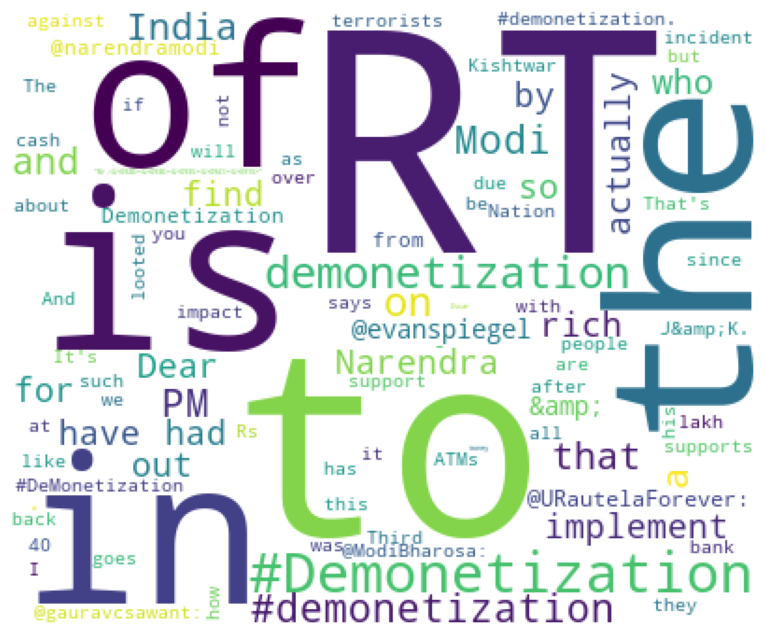

In [17]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=200, 
        background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12, 8))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [19]:
import re
def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    #Fix &
    text = re.sub(r'&amp;', '', text)  
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)
    #Convert to lowercase to maintain consistency
    text = text.lower() 
    # remove digits
    text = re.sub(r'\d+', '', text)
    #Fix %
    text = re.sub(r'%', '', text)
    return text

In [20]:
from wordcloud import STOPWORDS
print(STOPWORDS)

{'we', "i'm", 'but', 'that', 'more', 'these', "i'd", 'over', 'them', "weren't", 'both', 'out', "why's", 'have', 'ours', 'was', 'has', 'there', "they're", 'i', 'their', 'while', 'on', "you'd", 'any', "couldn't", 'having', 'com', 'very', "she's", "wouldn't", 'further', 'hence', "we'll", "shouldn't", 'doing', "doesn't", 'each', "shan't", 'it', 'is', 'through', 'so', 'an', 'some', 'once', 'his', 'if', 'for', 'most', 'such', "haven't", 'no', "what's", 'where', 'nor', "don't", "can't", 'because', 'myself', 'themselves', "that's", 'since', 'me', 'get', "how's", 'than', "you're", 'being', 'same', 'before', 'itself', 'against', "here's", 'below', 'how', 'few', "he'd", "hasn't", 'am', 'are', 'after', 'off', 'then', "let's", "she'd", 'as', 'www', "hadn't", 'whom', "they've", 'yourselves', 'yourself', 'a', 'yours', 'between', 'himself', 'not', 'cannot', 'by', 'too', 'why', 'r', "i'll", "mustn't", 'who', "i've", 'own', 'ourselves', 'do', 'you', 'like', 'he', "wasn't", 'would', 'shall', 'all', 'him'

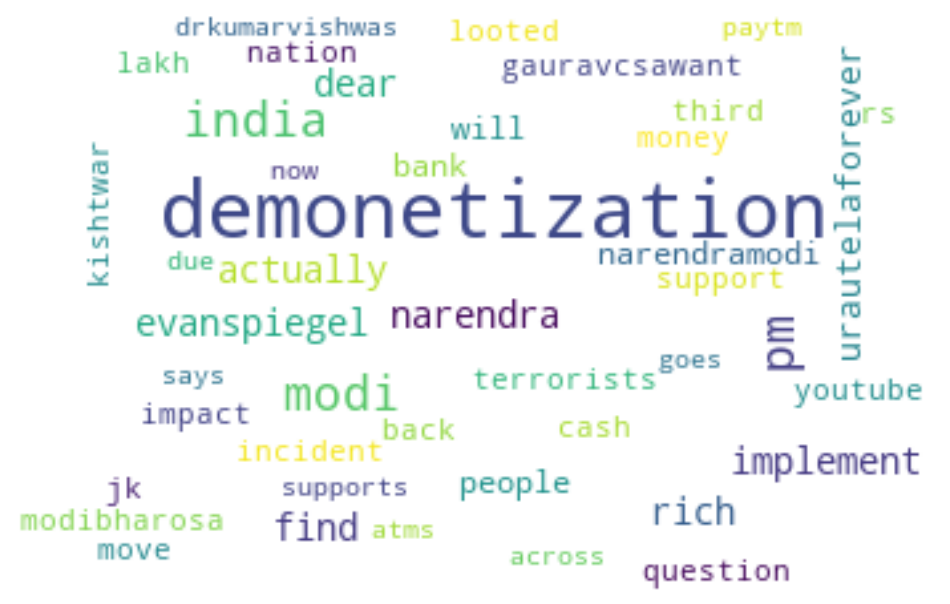

In [21]:
text = dataset.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')
 
#Generate word cloud
wc = WordCloud(width=350, height=220, max_words=500, 
               background_color='white').generate_from_frequencies(word_freq)
 
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
import pandas as pd 
 
text = ['Sarah lives in a hut in the village.', 
      'She has an apple tree in her backyard.', 
      'The apples are red in colour.']
 
df = pd.DataFrame(text, columns=['Sentence'])
 
df

,Sentence
0,Sarah lives in a hut in the village.
1,She has an apple tree in her backyard.
2,The apples are red in colour.
